# **Regresi Linear - House Prices**

---



---

### Library

In [ ]:
import pandas as pd
import pylab as py
import numpy as np
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy import stats

In [ ]:
df=pd.read_csv('house_price.csv')

### Data Understanding

Dataset ini memiliki 20 attributes, diantaranya sebagai berikut :

* id : A notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of bedrooms
* bathrooms: Number of bathrooms
* sqft_living: Square footage of the home
* sqft_lot: Square footage of the lot
* floors :Total floors (levels) in house
* waterfront :House which has a view to a waterfront
* view: Has been viewed
* condition :How good the condition is overall
* grade: overall grade given to the housing unit, based on King County grading system
* sqft_above : Square footage of house apart from basement
* qft_basement: Square footage of the basement
* yr_built : Built Year
* yr_renovated : Year when house was renovated
* zipcode: Zip code
* lat: Latitude coordinate
* long: Longitude coordinate
* sqft_living15 : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
* sqft_lot15 : LotSize area in 2015(implies-- some renovations)

### Checking Data

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# df[['id','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built']]

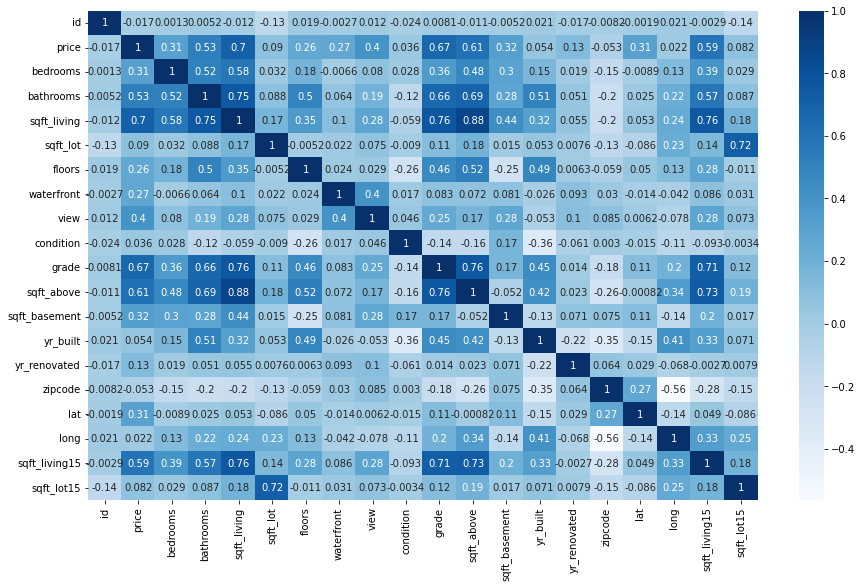

In [ ]:
viz_corr = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(viz_corr, annot=True, cmap="Blues")

In [ ]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

Jika diliat korelasi antara price dengan variabel yang lain maka didapatkan 5 variabel yang paling besar nilai korelasinya dengan price, yaitu sqft_living, grade, sqft_above, sqft_living15, dan bathrooms

### Data Preprocessing

In [ ]:
df = df.drop(["id"],axis=1)

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df = df[['price','sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']]

menghilangkan variabel yang kurang berkorelasi dengan harga

Multiple Linier Regression dikarenakan memiliki lebih dari 1 variabel bebas.

* Independent Variable(X) : sqft_living15, bathrooms, sqft_living, grade, sqft_above
* Depent Variable(Y) : price

In [ ]:
df.head(10)

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms
0,221900.0,1180,7,1180,1340,1.00
1,538000.0,2570,7,2170,1690,2.25
2,180000.0,770,6,770,2720,1.00
3,604000.0,1960,7,1050,1360,3.00
4,510000.0,1680,8,1680,1800,2.00
5,1225000.0,5420,11,3890,4760,4.50
6,257500.0,1715,7,1715,2238,2.25
7,291850.0,1060,7,1060,1650,1.50
8,229500.0,1780,7,1050,1780,1.00
9,323000.0,1890,7,1890,2390,2.50


In [ ]:
df.dtypes

price            float64
sqft_living        int64
grade              int64
sqft_above         int64
sqft_living15      int64
bathrooms        float64
dtype: object

In [ ]:
#merubah tipe data bathrooms
df['bathrooms'] = df['bathrooms'].astype(int)

### Data Visualisasi

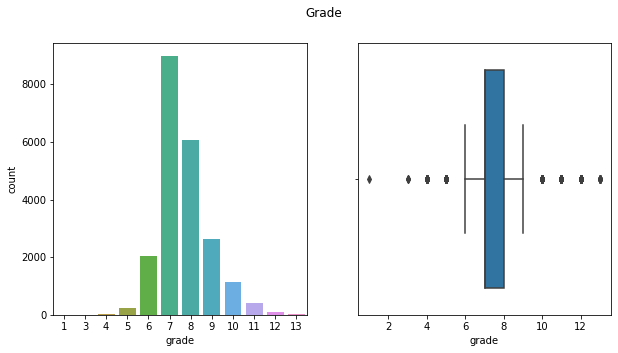

In [ ]:
#Grade
fr, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fr.suptitle('Grade')
sns.countplot(ax=ax1, data=df, x='grade')
sns.boxplot(ax=ax2, data=df, x='grade')


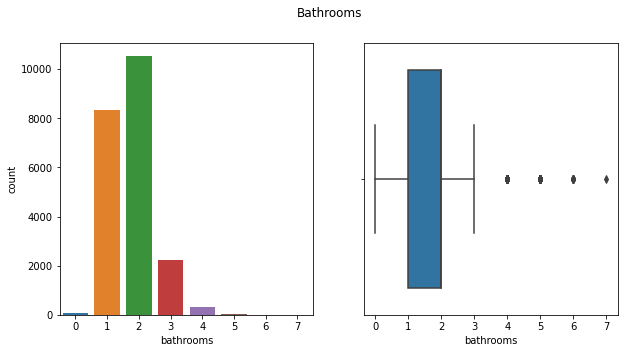

In [ ]:
#Bathrooms
fr, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fr.suptitle('Bathrooms')
sns.countplot(ax=ax1, data=df, x='bathrooms')
sns.boxplot(ax=ax2, data=df, x='bathrooms')

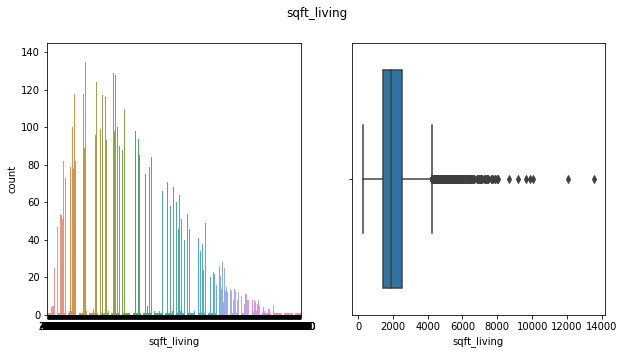

In [ ]:
#sqft_living
fr, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fr.suptitle('sqft_living')
sns.countplot(ax=ax1, data=df, x='sqft_living')
sns.boxplot(ax=ax2, data=df, x='sqft_living')

Untuk menghindari anomali pada pemodelan nanti, maka rumah yang memiiki luas tanah(sqft_living) diatas 8500 akan dihapus

In [ ]:
# df[df["sqft_living"] >= 8500].drop()
df.drop(df.loc[df['sqft_living']>=8500].index, inplace=True)


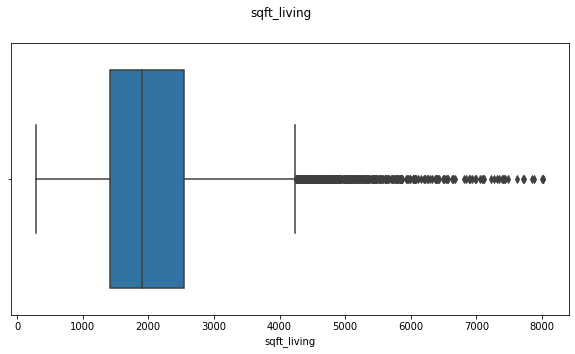

In [ ]:
fr, (ax2) = plt.subplots(figsize=(10,5))
fr.suptitle('sqft_living')
sns.boxplot(ax=ax2, data=df, x='sqft_living')

In [ ]:
df.dtypes

price            float64
sqft_living        int64
grade              int64
sqft_above         int64
sqft_living15      int64
bathrooms          int64
dtype: object

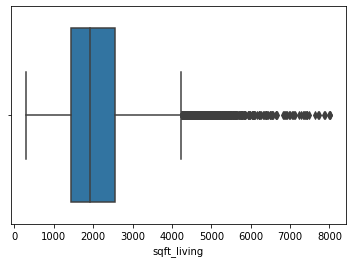

In [ ]:
#Grade
sns.boxplot(data=df, x='sqft_living')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


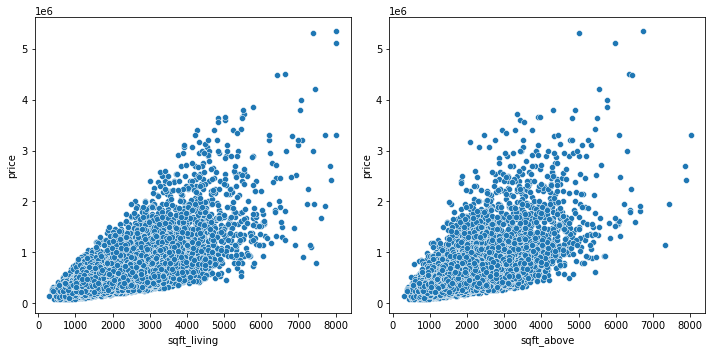

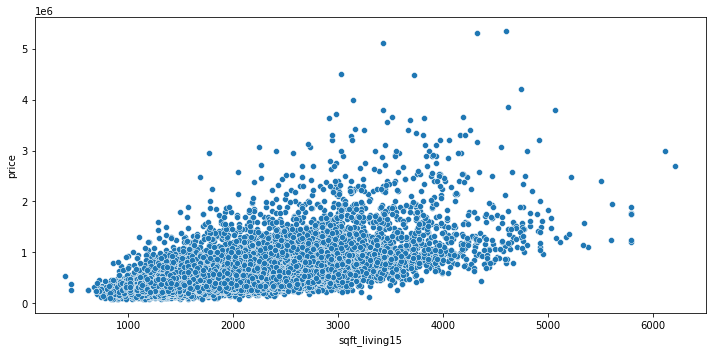

In [ ]:
#Pesebaran sqft_living, sqft_above, & sqft_living15 terhadap price
features_cont = ['sqft_living', 'sqft_above']
fig, axes = plt.subplots(1,2, figsize=(10,5))
for xcol, ax in zip(features_cont, axes.flatten()):
    sns.scatterplot(xcol, 'price', data=df, ax=ax)
plt.tight_layout()

fig = plt.figure(figsize=(10, 5))
sns.scatterplot('sqft_living15', 'price', data=df)

plt.tight_layout()



cek aja

In [ ]:
df_tes=df

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

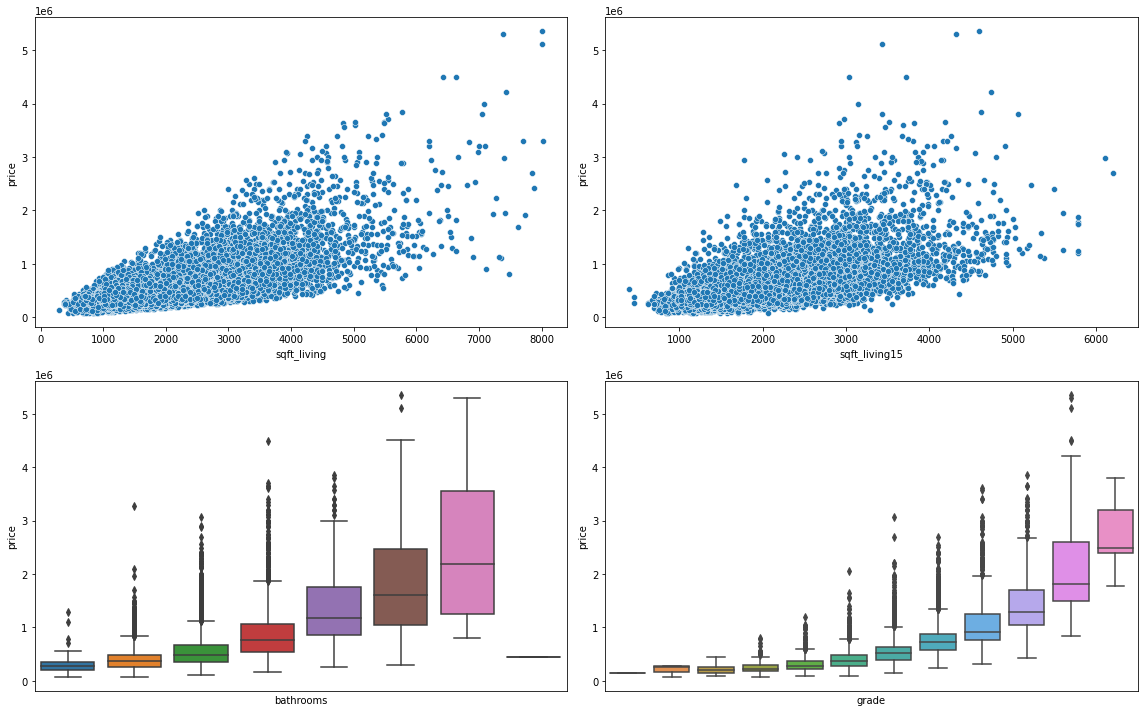

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(16,10))

sns.scatterplot('sqft_living', 'price', data=df_tes, ax=axes[0,0])
sns.scatterplot('sqft_living15', 'price', data=df_tes, ax=axes[0,1])
sns.boxplot('bathrooms', 'price', data=df_tes, ax=axes[1,0])
sns.boxplot('grade', 'price', data=df_tes, ax=axes[1,1])
axes[1,0].set_xticks([])
axes[1,1].set_xticks([])

plt.tight_layout()

In [ ]:
df_tes['price'] = df['price'].astype(int)

### Pemodelan Regresi Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#Pertama, buat variabel x dan y.
x = df.drop(columns='price')
y = df['price']
#Kedua, ucup split data menjadi training and testing dengan porsi 90:10.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=4)
#Ketiga, ucup bikin object linear regresi.
lin_reg = LinearRegression()
#Keempat, train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train, y_train)
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 2.09102565e+02  1.06548208e+05 -8.41599776e+01  3.92595749e+01
  1.64802467e+03]
-642350.013343949


In [ ]:
lin_reg.score(x_test, y_test)


0.5568829909967401

### Evaluasi



*   Uji Korelasi    = df.corr
*   Uji Normalisasi = Seandainya nilai p>0.05 maka itu buruk
*   Uji Hipotesis   =
*   Uji T           =  Seandainya nilai t < 0.05 maka itu buruk
*   Nilai MAE       = 160033.32078485965
*   Nilai MSE       = 57843060914.67174
*   Nilai R(r^2)    = 0.542

In [ ]:
y_pred = lin_reg.predict(x_test)

In [ ]:
# Memasukkan nilai konstanta pada model
x = sm.add_constant(x)
# Mencetak hasil regresi dan penilaian model
model = sm.OLS(y, x).fit()
print(model.summary())
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
print('Model Score: ', lin_reg.score(np.array(x_test), y_test))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     5110.
Date:                Sat, 24 Dec 2022   Prob (F-statistic):               0.00
Time:                        07:12:14   Log-Likelihood:            -2.9837e+05
No. Observations:               21606   AIC:                         5.967e+05
Df Residuals:                   21600   BIC:                         5.968e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.554e+05   1.31e+04    -49.938

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


R-squared berada pada nilai 0,542 atau 54,2%.
(Uji Normalitas)Terdapat nilai p-value yang lebih dari 0.05 yakni pada variabel bathrooms, sehingga perlu dihilangkan jika ingin mendapatkan hasil yang lebih bagus.



In [ ]:
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape
# Prediksi pada data-test
LR_Test_predict = lin_reg.predict(x_test) 
 
# Menghitung nilai MAPE
LR_MAPE= MAPE(y_test,LR_Test_predict)
print("MAPE: ",LR_MAPE)

MAPE:  33.01402038900571


masuk kedalam kategori wajar karena berada pada kategoti 3 (20-50%)

In [ ]:
#Mencari Nilai MAE
from sklearn.metrics import mean_absolute_error

predictions = model.predict(x)
mae = mean_absolute_error(y, predictions)

print("MAE:", mae)

MAE: 160033.32078485965


In [ ]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(x)
mse = mean_squared_error(y, predictions)

print("MSE:", mse)

MSE: 57843060914.67174


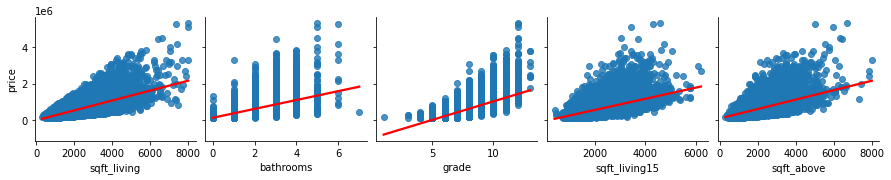

In [ ]:
sns.pairplot(df, x_vars=['sqft_living', 'bathrooms', 'grade', 'sqft_living15', 'sqft_above'],
             y_vars=['price'], kind='reg', plot_kws={'line_kws':{'color':'red'}})

Dari pairplot, dapat disimpulkan bahwa luas rumah sangat mempengaruhi harga dari sebuah rumah. Begitu juga dengan jumlah kamar mandi, grade, luas rumah di atas permukaan tanah dan luas rumah dari 15 tetangga terdekat juga cukup mempengaruhi harga sebuah rumah di King County.

In [ ]:
df_tes.corr().style.background_gradient().set_precision(2)

<ipython-input-34-ed59bb974106>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_tes.corr().style.background_gradient().set_precision(2)


,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms
price,1.00,0.70,0.67,0.60,0.59,0.50
sqft_living,0.70,1.00,0.76,0.88,0.76,0.69
grade,0.67,0.76,1.00,0.76,0.71,0.60
sqft_above,0.60,0.88,0.76,1.00,0.73,0.64
sqft_living15,0.59,0.76,0.71,0.73,1.00,0.51
bathrooms,0.50,0.69,0.60,0.64,0.51,1.00


### Percobaan Uji Prediksi

In [ ]:
np.set_printoptions(precision=3)
print("Prediksi Harga Rumah: ", lin_reg.predict([[3000,5,2000,1130,4]]))

Prediksi Harga Rumah:  [400334.184]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Definisi

Mean Squared Error (MSE) adalah salah satu ukuran kinerja yang sering digunakan dalam evaluasi model. MSE mengukur rata-rata kuadrat error antara nilai yang sebenarnya (atau target) dan nilai yang diprediksi oleh model.

MSE dihitung dengan mengurangi setiap error (perbedaan antara nilai sebenarnya dan nilai yang diprediksi) dengan kuadratnya, kemudian mengurangi semuanya dan membagi hasilnya dengan jumlah data. Matematisnya, MSE dapat dituliskan sebagai:

MSE = 1/n * sum((y_true - y_pred)^2)

Di mana:

n adalah jumlah data
y_true adalah nilai sebenarnya
y_pred adalah nilai yang diprediksi oleh model
MSE berguna karena memberikan penghargaan yang lebih besar pada error yang lebih besar, sehingga lebih mudah untuk mengevaluasi kinerja model yang buruk. Namun, MSE juga memiliki kekurangan, seperti tidak dapat diinterpretasikan secara langsung (nilainya tidak dalam satuan yang sama dengan variabel yang diprediksi) dan tidak robust terhadap outlier. Oleh karena itu, MSE sering digunakan bersama dengan ukuran kinerja lainnya untuk memperoleh gambaran yang lebih komprehensif tentang kinerja model.



Try again

Mean Absolute Error (MAE) adalah salah satu ukuran kinerja yang sering digunakan dalam evaluasi regresi. MAE mengukur rata-rata error absolut antara nilai yang sebenarnya (atau target) dan nilai yang diprediksi oleh model.

MAE dihitung dengan mengurangi setiap error (perbedaan antara nilai sebenarnya dan nilai yang diprediksi) dengan nilai absolutnya, kemudian mengurangi semuanya dan membagi hasilnya dengan jumlah data. Matematisnya, MAE dapat dituliskan sebagai:

MAE = 1/n * sum(|y_true - y_pred|)

Di mana:

n adalah jumlah data
y_true adalah nilai sebenarnya
y_pred adalah nilai yang diprediksi oleh model
MAE berguna karena memberikan penghargaan yang sama untuk semua error, sehingga lebih mudah untuk mengevaluasi model yang tidak terlalu dipengaruhi oleh outlier. Namun, MAE juga memiliki kekurangan, seperti tidak dapat menghasilkan penalisasi yang lebih besar untuk error yang lebih besar dan tidak dapat diinterpretasikan secara langsung (nilainya tidak dalam satuan yang sama dengan variabel yang diprediksi). Oleh karena itu, MAE sering digunakan bersama dengan ukuran kinerja lainnya untuk memperoleh gambaran yang lebih komprehensif tentang kinerja model.

### Tes aja

In [ ]:
df[df['sqft_living']<1000].sort_values(by='sqft_living')

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms
19452,142000,290,1,290,1620,0
15381,276000,370,5,370,1340,0
860,245000,380,5,380,1170,0
18379,265000,384,4,384,1920,0
21332,245000,390,6,390,1340,1
...,...,...,...,...,...,...
13705,490000,990,7,990,2250,1
3975,210000,990,6,990,2150,1
5984,354000,990,6,990,1100,1
21538,324000,998,7,798,998,2


In [ ]:
df.describe()

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms
count,2.160600e+04,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000
mean,5.385482e+05,2077.193511,7.655327,1786.579098,1985.889521,1.748264
std,3.553357e+05,905.738185,1.172433,821.596176,684.452179,0.730016
min,7.500000e+04,290.000000,1.000000,290.000000,399.000000,0.000000
25%,3.215000e+05,1422.750000,7.000000,1190.000000,1490.000000,1.000000
50%,4.500000e+05,1910.000000,7.000000,1560.000000,1840.000000,2.000000
75%,6.450000e+05,2550.000000,8.000000,2210.000000,2360.000000,2.000000
max,5.350000e+06,8020.000000,13.000000,8020.000000,6210.000000,7.000000


y = x1+x2+x3
y = x.open + x.low + x.high
y = -